In [1]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
import sklearn.preprocessing as preproc
from sklearn.feature_extraction import text
import pickle
import warnings

[nltk_data] Downloading package stopwords to C:\Users\Keshav
[nltk_data]     Gambhir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Keshav
[nltk_data]     Gambhir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
np.random.seed(500)

In [3]:
Corpus = pd.read_csv(r"C:\\Users\\Keshav Gambhir\\Desktop\\Sexist_Statements.csv",encoding='latin-1')

In [4]:
import pandas as pd
import numpy as np
import nltk
import pickle
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to C:\Users\Keshav
[nltk_data]     Gambhir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Keshav
[nltk_data]     Gambhir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Keshav Gambhir\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\Keshav
[nltk_data]     Gambhir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
Corpus['Sentences'].dropna(inplace = True)

# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['Sentences'] = [entry.lower() for entry in Corpus['Sentences']]

# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['Sentences']= [word_tokenize(entry) for entry in Corpus['Sentences']]

# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['Sentences']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

print(Corpus['text_final'])

0                                       ['woman', 'good']
1                   ['dress', 'sexy', 'sign', 'contract']
2                                              ['period']
3                                      ['stop', 'bitchy']
4       ['leave', 'early', 'child', 'instead', 'husband']
                              ...                        
1132    ['opportunity', 'like', 'night', 'owl', 'like'...
1133    ['question', 'love', 'living', 'love', 'love',...
1134    ['genius', 'master', 'ordinary', 'man', 'try',...
1135    ['want', 'know', 'real', 'reason', 'behind', '...
1136    ['questioning', 'important', 'breakthrough', '...
Name: text_final, Length: 1137, dtype: object


In [6]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['Label'],test_size=0.3)

Encoder = LabelEncoder()
# print(Train_Y)
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
# print(Train_Y)

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

0.7719298245614035


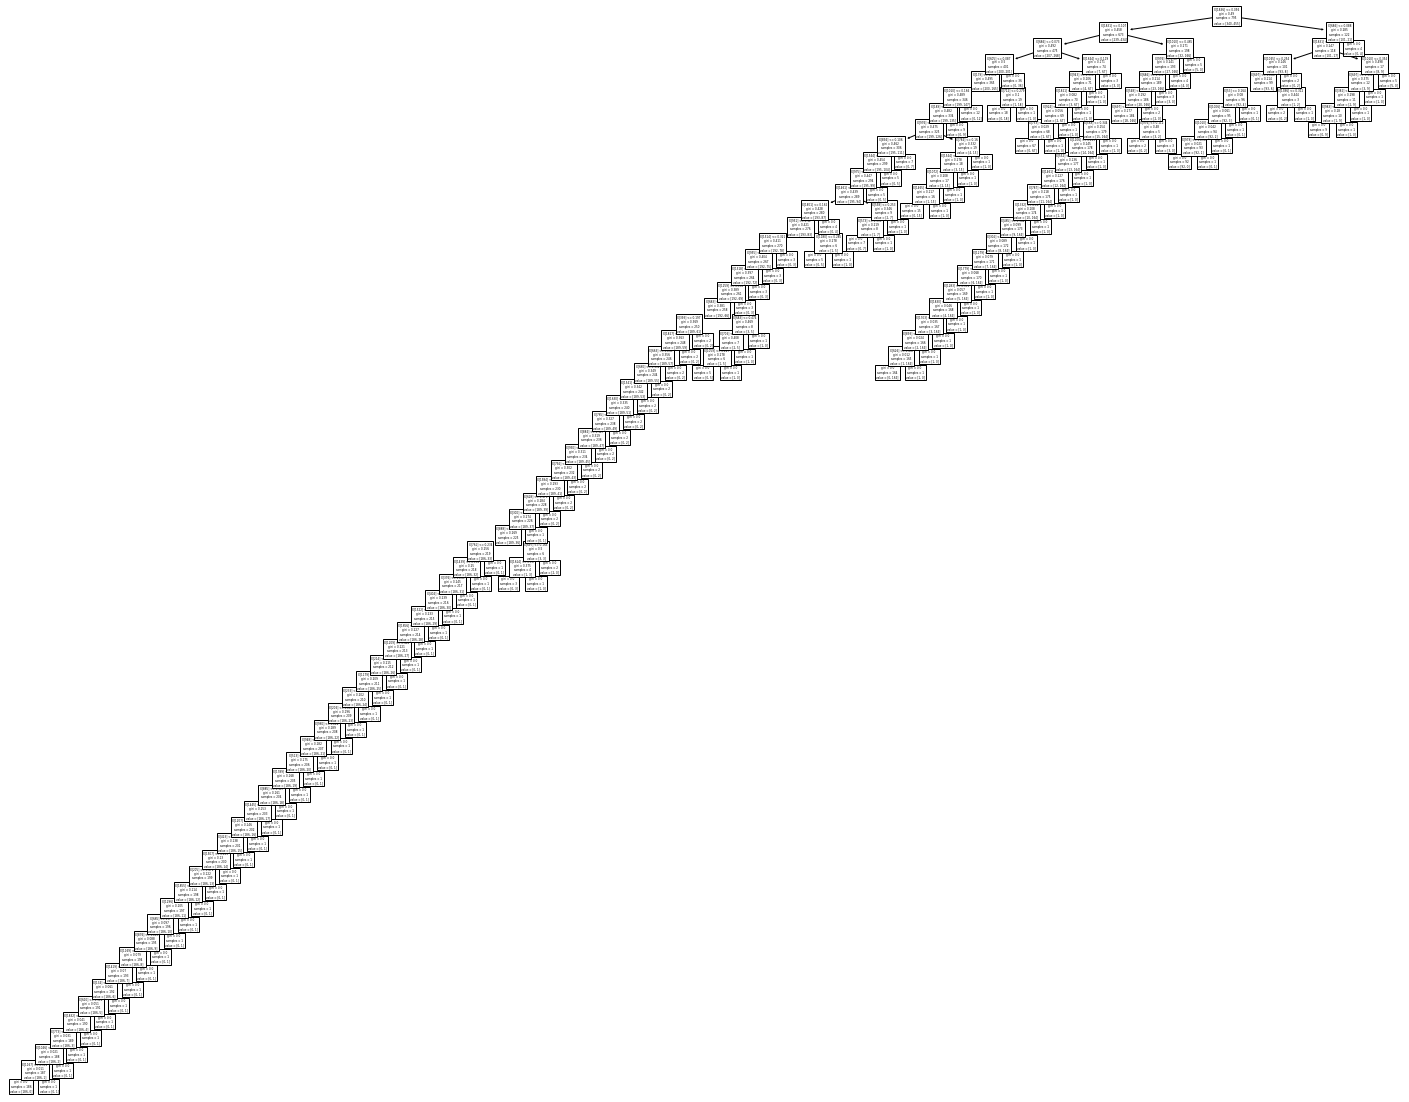

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier()
clf = clf.fit(Train_X_Tfidf,Train_Y)
y_pred = clf.predict(Test_X_Tfidf)
print(accuracy_score(Test_Y,y_pred))
text_representation = tree.export_text(clf)
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score,  accuracy_score
clf=RandomForestClassifier(n_estimators=100)
clf = clf.fit(Train_X_Tfidf,Train_Y)
y_pred = clf.predict(Test_X_Tfidf)
print(accuracy_score(Test_Y,y_pred))
print(recall_score(Test_Y,y_pred))
print(precision_score(Test_Y,y_pred))

0.7690058479532164
0.7928994082840237
0.7528089887640449


In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()
gradient_booster.fit(Train_X_Tfidf,Train_Y)
y_pred = gradient_booster.predict(Test_X_Tfidf)
print(accuracy_score(Test_Y,y_pred))

0.7777777777777778
